In [1]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import quad
import multiprocessing as mp
import gc
import matplotlib.colors as colors



In [2]:
plt.rc('font',size=25)
pd.set_option('max_column',200)

# star's distance

In [3]:
ms=pd.read_csv('../Downloads/catalog/star_after_calibration_dist_sm2_multi.csv')

In [9]:
gi=ms.g_psfflux_mag-ms.i_psfflux_mag
gr=ms.g_psfflux_mag-ms.r_psfflux_mag
ug=ms.psfmag_u-ms.g_psfflux_mag
FeH=getPhotomMetallicityBond2010(ug,gr)
Dkpc=getMainSequenceDistanceKpc(gi,FeH,ms.r_psfflux_mag)

In [10]:
ms['ug']=ug
ms['gr']=gr
ms['gi']=gi
ms['FeH']=FeH
ms['Dkpc']=Dkpc

In [12]:
mss=ms.drop(ms[ms.Dkpc.isna()].index)

In [13]:
mss.to_csv('../Downloads/catalog/star_after_calibration_dist.csv')

## all star

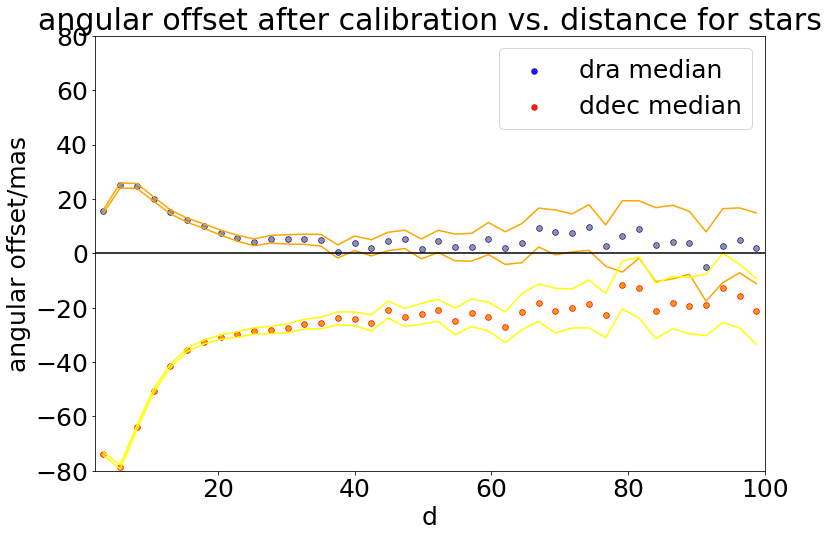

In [30]:

r = mss.r_psfflux_mag
gr = mss.gr
D = mss.Dkpc
pmra = mss.dra_cl
pmdec = mss.ddec_cl
fig,ax = plt.subplots(1,1,figsize=(12,8))
#ax.scatter(D, pmra, s=0.01, c='blue', label='dra')
#ax.scatter(D, pmdec, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-80,80)
ax.set_xlabel('d')
ax.set_ylabel('angular offset/mas')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pmra, 2, 100, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmdec, 2, 100, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='dra median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='ddec median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('angular offset after calibration vs. distance for stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/delta_vs_d_allstar.png')

In [26]:
#mb for blue star 0.2<gr<0.6
mb=mss[(mss.gr<0.6)&(mss.gr>0.2)]
#mr for red star 1.2<gr<1.6
mr=mss[(mss.gr>1.2)&(mss.gr<1.6)]

## blue star

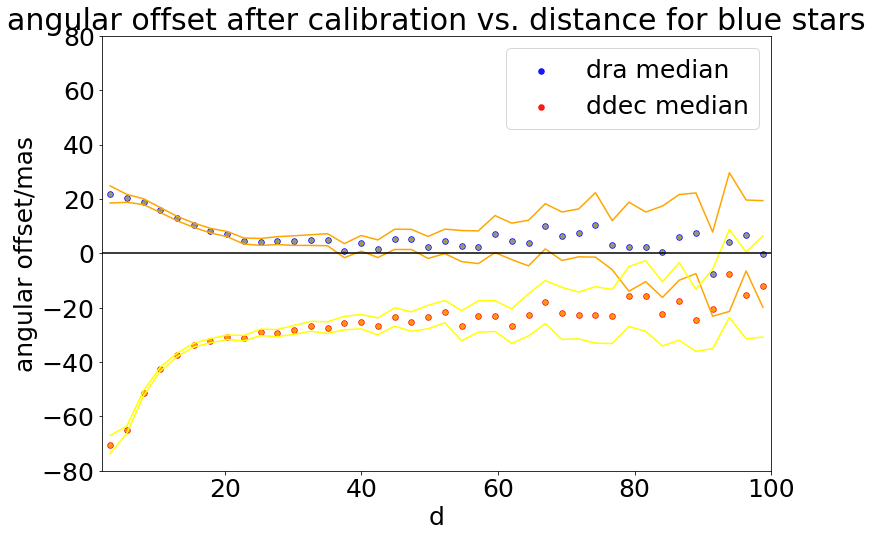

In [42]:

r = mb.r_psfflux_mag
gr = mb.gr
D = mb.Dkpc
pmra = mb.dra_cl
pmdec = mb.ddec_cl
t=mb
fig,ax = plt.subplots(1,1,figsize=(12,8))
#plt.scatter(t.Dkpc, t.dra_cl, s=0.01, c='blue', label='dra')
#plt.scatter(t.Dkpc, t.ddec_cl, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-80,80)
ax.set_xlabel('d')
ax.set_ylabel('angular offset/mas')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pmra, 2, 100, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmdec, 2, 100, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='dra median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='ddec median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('angular offset after calibration vs. distance for blue stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/delta_vs_d_bluestar.png')

## red star

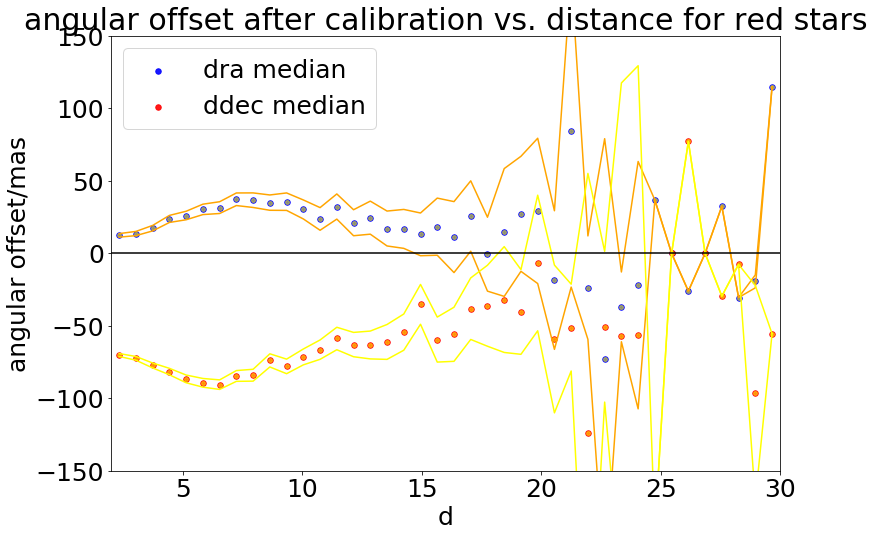

In [40]:

r = mr.r_psfflux_mag
gr = mr.gr
D = mr.Dkpc
pmra = mr.dra_cl
pmdec = mr.ddec_cl
t=mr
fig,ax = plt.subplots(1,1,figsize=(12,8))
#plt.scatter(t.Dkpc, t.dra_cl, s=0.01, c='blue', label='dra')
#plt.scatter(t.Dkpc, t.ddec_cl, s=0.01, c='red', label='ddec')
ax.set_xlim(2,30)
ax.set_ylim(-150,150)
ax.set_xlabel('d')
ax.set_ylabel('angular offset/mas')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pmra, 2, 30, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmdec, 2, 30, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='dra median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='ddec median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('angular offset after calibration vs. distance for red stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/delta_vs_d_redstar.png')

## comparison of different grid size

### 0.05*0.05

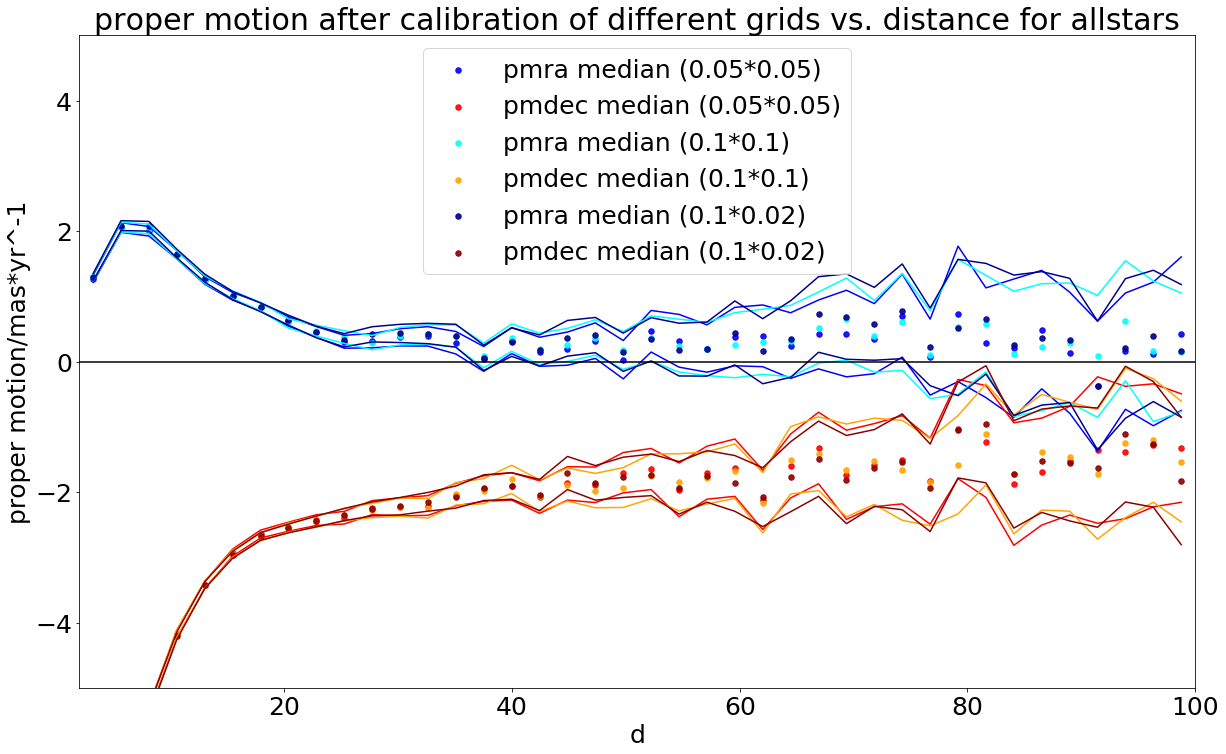

In [67]:

r = ms.r_psfflux_mag
gr = ms.gr
D = ms.Dkpc
pmra = ms['pmra_cl0.05']
pmdec = ms['pmdec_cl0.05']
pmra2 = ms['pmra_cl0.1']
pmdec2 = ms['pmdec_cl0.1']
pmra3 = ms['pmra_cl']
pmdec3 = ms['pmdec_cl']
fig,ax = plt.subplots(1,1,figsize=(20,12))
#ax.scatter(D, pmra, s=0.01, c='blue', label='dra')
#ax.scatter(D, pmdec, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-5,5)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pmra, 2, 100, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmdec, 2, 100, 40, 0)
x3Bin, n3Pts, m3edianBin, s3igGbin = fitMedians(D, pmra2, 2, 100, 40, 0)
x4Bin, n4Pts, m4edianBin, s4igGbin = fitMedians(D, pmdec2, 2, 100, 40, 0)
x5Bin, n5Pts, m5edianBin, s5igGbin = fitMedians(D, pmra3, 2, 100, 40, 0)
x6Bin, n6Pts, m6edianBin, s6igGbin = fitMedians(D, pmdec3, 2, 100, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmra median (0.05*0.05)')
#ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmdec median (0.05*0.05)')
#ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x3Bin, m3edianBin, s=30.0, c='cyan', alpha=0.9, label='pmra median (0.1*0.1)')
#ax.scatter(x3Bin, m3edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x4Bin, m4edianBin, s=30.0, c='orange', alpha=0.9, label='pmdec median (0.1*0.1)')
#ax.scatter(x4Bin, m4edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x5Bin, m5edianBin, s=30.0, c='darkblue', alpha=0.9, label='pmra median (0.1*0.02)')
#ax.scatter(x3Bin, m3edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x6Bin, m6edianBin, s=30.0, c='darkred', alpha=0.9, label='pmdec median (0.1*0.02)')
#ax.scatter(x4Bin, m4edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
T3woSigP = m3edianBin + 2*s3igGbin
T3woSigM = m3edianBin - 2*s3igGbin 
T4woSigP = m4edianBin + 2*s4igGbin
T4woSigM = m4edianBin - 2*s4igGbin 
T5woSigP = m5edianBin + 2*s5igGbin
T5woSigM = m5edianBin - 2*s5igGbin 
T6woSigP = m6edianBin + 2*s6igGbin
T6woSigM = m6edianBin - 2*s6igGbin 
ax.plot(x1Bin, T1woSigP, c='blue')
ax.plot(x1Bin, T1woSigM, c='blue')
ax.plot(x2Bin, T2woSigP, c='red')
ax.plot(x2Bin, T2woSigM, c='red')
ax.plot(x3Bin, T3woSigP, c='cyan')
ax.plot(x3Bin, T3woSigM, c='cyan')
ax.plot(x4Bin, T4woSigP, c='orange')
ax.plot(x4Bin, T4woSigM, c='orange')
ax.plot(x5Bin, T5woSigP, c='darkblue')
ax.plot(x5Bin, T5woSigM, c='darkblue')
ax.plot(x6Bin, T6woSigP, c='darkred')
ax.plot(x6Bin, T6woSigM, c='darkred')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion after calibration of different grids vs. distance for allstars')
plt.legend()
plt.savefig('../Downloads/cali_dist/pm_vs_d_allstar_diff_grid.png')

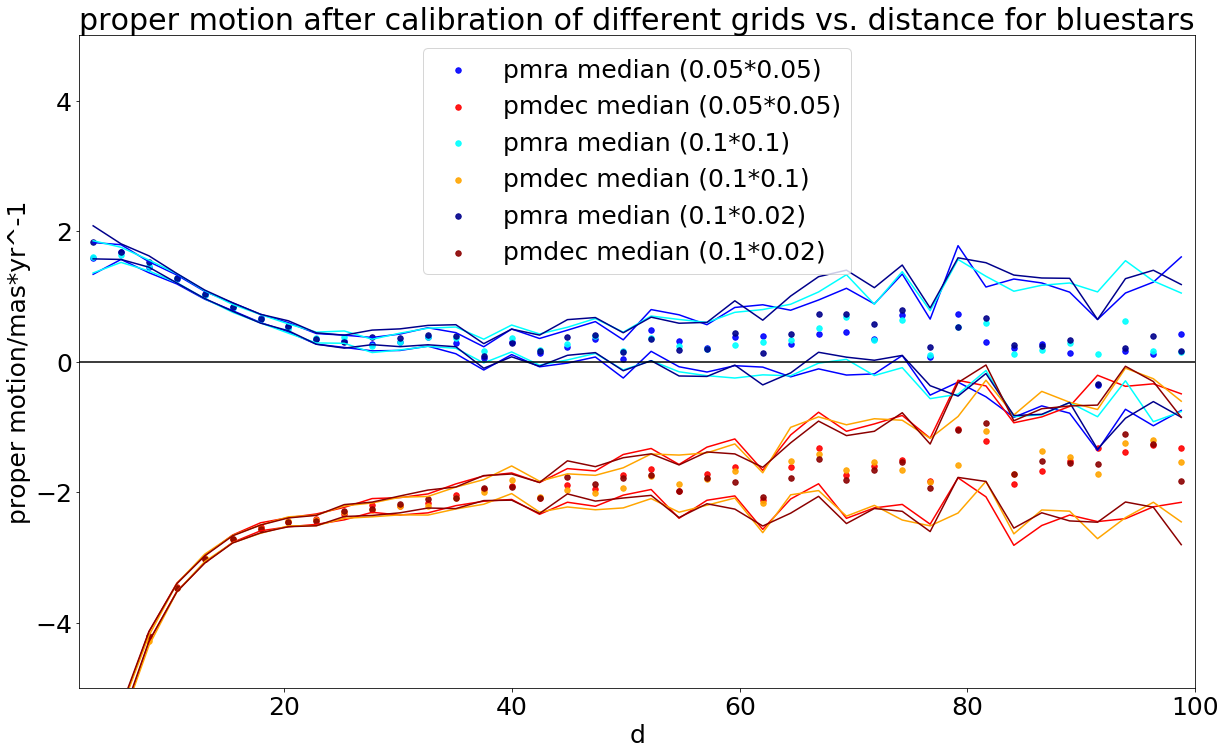

In [66]:
mb=ms[ms.gr<0.6]
r = mb.r_psfflux_mag
gr = mb.gr
D = mb.Dkpc
pmra = mb['pmra_cl0.05']
pmdec = mb['pmdec_cl0.05']
pmra2 = mb['pmra_cl0.1']
pmdec2 = mb['pmdec_cl0.1']
pmra3 = mb['pmra_cl']
pmdec3 = mb['pmdec_cl']
fig,ax = plt.subplots(1,1,figsize=(20,12))
#ax.scatter(D, pmra, s=0.01, c='blue', label='dra')
#ax.scatter(D, pmdec, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-5,5)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pmra, 2, 100, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmdec, 2, 100, 40, 0)
x3Bin, n3Pts, m3edianBin, s3igGbin = fitMedians(D, pmra2, 2, 100, 40, 0)
x4Bin, n4Pts, m4edianBin, s4igGbin = fitMedians(D, pmdec2, 2, 100, 40, 0)
x5Bin, n5Pts, m5edianBin, s5igGbin = fitMedians(D, pmra3, 2, 100, 40, 0)
x6Bin, n6Pts, m6edianBin, s6igGbin = fitMedians(D, pmdec3, 2, 100, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmra median (0.05*0.05)')
#ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmdec median (0.05*0.05)')
#ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x3Bin, m3edianBin, s=30.0, c='cyan', alpha=0.9, label='pmra median (0.1*0.1)')
#ax.scatter(x3Bin, m3edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x4Bin, m4edianBin, s=30.0, c='orange', alpha=0.9, label='pmdec median (0.1*0.1)')
#ax.scatter(x4Bin, m4edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x5Bin, m5edianBin, s=30.0, c='darkblue', alpha=0.9, label='pmra median (0.1*0.02)')
#ax.scatter(x3Bin, m3edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x6Bin, m6edianBin, s=30.0, c='darkred', alpha=0.9, label='pmdec median (0.1*0.02)')
#ax.scatter(x4Bin, m4edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
T3woSigP = m3edianBin + 2*s3igGbin
T3woSigM = m3edianBin - 2*s3igGbin 
T4woSigP = m4edianBin + 2*s4igGbin
T4woSigM = m4edianBin - 2*s4igGbin 
T5woSigP = m5edianBin + 2*s5igGbin
T5woSigM = m5edianBin - 2*s5igGbin 
T6woSigP = m6edianBin + 2*s6igGbin
T6woSigM = m6edianBin - 2*s6igGbin 
ax.plot(x1Bin, T1woSigP, c='blue')
ax.plot(x1Bin, T1woSigM, c='blue')
ax.plot(x2Bin, T2woSigP, c='red')
ax.plot(x2Bin, T2woSigM, c='red')
ax.plot(x3Bin, T3woSigP, c='cyan')
ax.plot(x3Bin, T3woSigM, c='cyan')
ax.plot(x4Bin, T4woSigP, c='orange')
ax.plot(x4Bin, T4woSigM, c='orange')
ax.plot(x5Bin, T5woSigP, c='darkblue')
ax.plot(x5Bin, T5woSigM, c='darkblue')
ax.plot(x6Bin, T6woSigP, c='darkred')
ax.plot(x6Bin, T6woSigM, c='darkred')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion after calibration of different grids vs. distance for bluestars')
plt.legend()
plt.savefig('../Downloads/cali_dist/pm_vs_d_bluestar_diff_grid.png')

### gaia result

In [9]:
msga=pd.read_csv('../Downloads/catalog/star_matched_gaia_Zeljko_after_calibration_dist_sm2.csv')

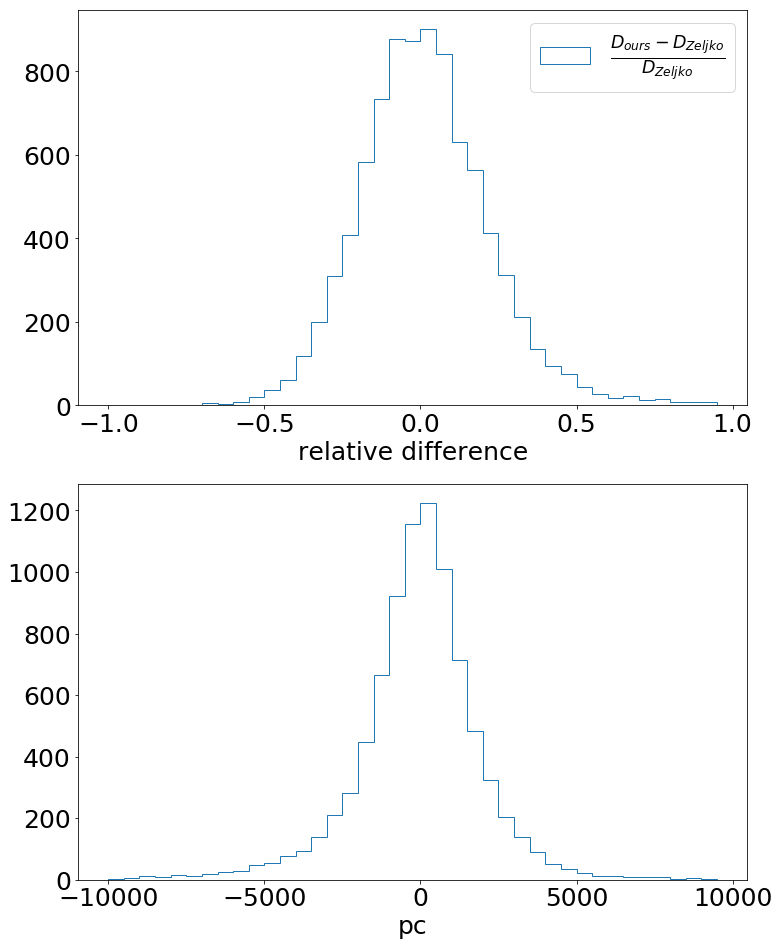

In [18]:
plt.figure(figsize=(12,16))
plt.subplot(211)
plt.hist((msga.Dkpc*1000-msga.D)/msga.D,bins=np.arange(-1,1,0.05),histtype='step',label=r'$\frac{D_{ours}-D_{Zeljko}}{D_{Zeljko}}$')
plt.xlabel('relative difference')
plt.legend()
plt.subplot(212)
plt.hist((msga.Dkpc*1000-msga.D),bins=np.arange(-10000,10000,500),histtype='step',label=r'$D_{ours}-D_{Zeljko}$')
plt.xlabel('pc')
plt.savefig('../Downloads/distance/relative_diff_ours_Zeljko.png')

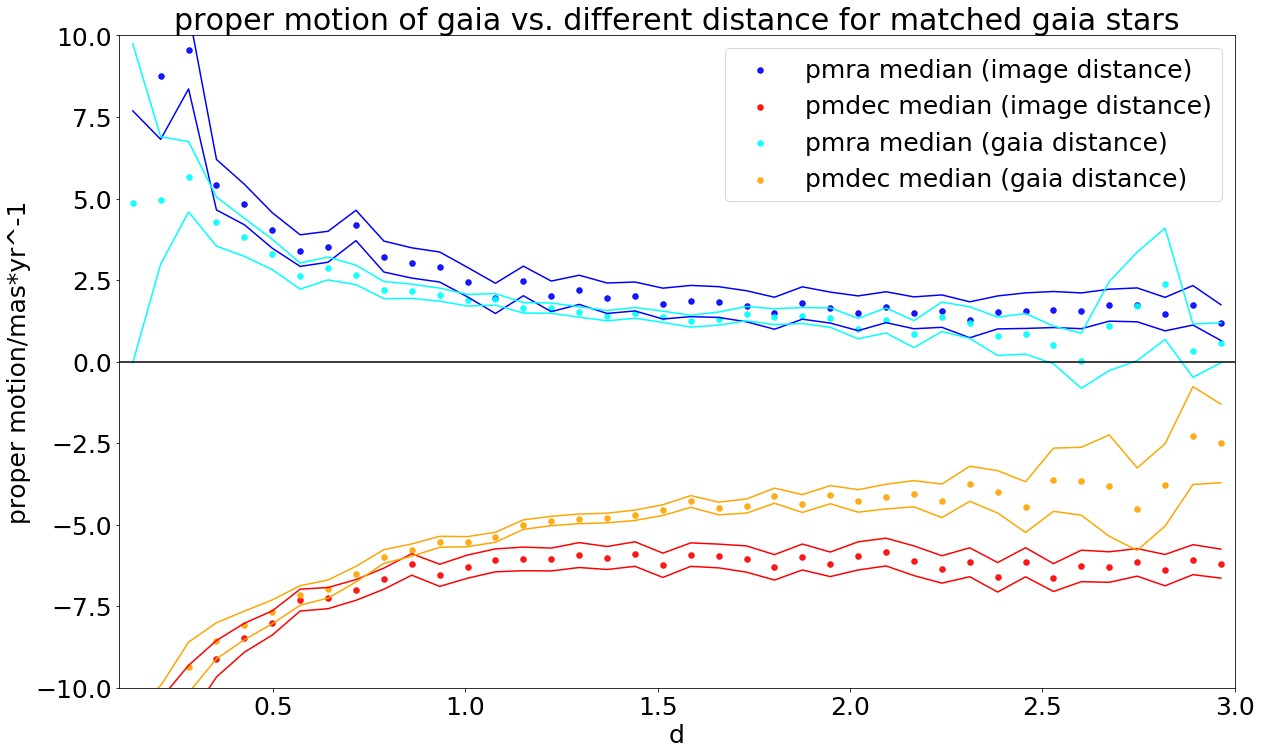

In [98]:

r = msga.r_psfflux_mag
gr = msga.gr
D = msga.Dkpc
D2 = msga.r_est/1000
pmra = msga['pmra_cl']
pmdec = msga['pmdec_cl']
pmra2 = msga['pmra']
pmdec2 = msga['pmdec']
fig,ax = plt.subplots(1,1,figsize=(20,12))
#ax.scatter(D, pmra, s=0.01, c='blue', label='dra')
#ax.scatter(D, pmdec, s=0.01, c='red', label='ddec')
ax.set_xlim(0.1,3)
ax.set_ylim(-10,10)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pmra2, 0.1, 3, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmdec2, 0.1, 3, 40, 0)
x3Bin, n3Pts, m3edianBin, s3igGbin = fitMedians(D2, pmra2, 0.1, 3, 40, 0)
x4Bin, n4Pts, m4edianBin, s4igGbin = fitMedians(D2, pmdec2, 0.1, 3, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmra median (image distance)')
#ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmdec median (image distance)')
#ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x3Bin, m3edianBin, s=30.0, c='cyan', alpha=0.9, label='pmra median (gaia distance)')
#ax.scatter(x3Bin, m3edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x4Bin, m4edianBin, s=30.0, c='orange', alpha=0.9, label='pmdec median (gaia distance)')
#ax.scatter(x4Bin, m4edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
T3woSigP = m3edianBin + 2*s3igGbin
T3woSigM = m3edianBin - 2*s3igGbin 
T4woSigP = m4edianBin + 2*s4igGbin
T4woSigM = m4edianBin - 2*s4igGbin 
ax.plot(x1Bin, T1woSigP, c='blue')
ax.plot(x1Bin, T1woSigM, c='blue')
ax.plot(x2Bin, T2woSigP, c='red')
ax.plot(x2Bin, T2woSigM, c='red')
ax.plot(x3Bin, T3woSigP, c='cyan')
ax.plot(x3Bin, T3woSigM, c='cyan')
ax.plot(x4Bin, T4woSigP, c='orange')
ax.plot(x4Bin, T4woSigM, c='orange')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion of gaia vs. different distance for matched gaia stars')
plt.legend()
plt.savefig('../Downloads/distance/pm_vs_d_gaiastar_diff_distance.png')

# after subtracting solor motion

In [17]:
ms=pd.read_csv('../Downloads/catalog/star_after_calibration_dist_sm2.csv')

/Users/tianqiu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ms.iloc[:,[8,9,11]]=ms.iloc[:,[8,9,11]].astype('float64',copy=False)

In [ ]:
ms.to_csv('../Downloads/catalog/star_after_calibration_dist_sm2.csv')

In [18]:
ms

,# object_id,ra_1,dec_1,i_extendedness_value,i_sdsscentroid_ra,i_sdsscentroid_dec,i_sdsscentroid_rasigma,i_sdsscentroid_decsigma,g_cmodel_mag,r_cmodel_mag,i_cmodel_mag,z_cmodel_mag,g_cmodel_magsigma,r_cmodel_magsigma,i_cmodel_magsigma,z_cmodel_magsigma,g_psfflux_mag,r_psfflux_mag,i_psfflux_mag,z_psfflux_mag,g_psfflux_magsigma,r_psfflux_magsigma,i_psfflux_magsigma,z_psfflux_magsigma,a_g,a_r,a_i,a_z,objID,run,rerun,camcol,field,ra_2,dec_2,flags,type,rowc_r,colc_r,rowcErr_r,colcErr_r,u,g,r,i,z,err_u,err_g,err_r,err_i,err_z,psfmag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfmagerr_u,psfmagerr_g,psfmagerr_r,psfmagerr_i,psfmagerr_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,Separation_1,ra_s_error,dec_s_error,dra,ddec,dra_err,ddec_err,dra_cl,ddec_cl,HSC_mean_mjd,S82_mean_mjd,delta_mjd,delta_yr,pmra_cl,pmdec_cl,pmra_cl_err,pmdec_cl_err,ug,gr,gi,FeH,Dkpc,pmra_cl_sm,pmdec_cl_sm,l,b,pm_lcosb,pm_b,pm_b_sm,pm_lcosb_sm,galcen_x,galcen_y,galcen_z,galcen_vx,galcen_vy,galcen_vz
0,41552906645668163,-30.502157,-0.417638,0.0,-30.502156,-0.417638,0.013185,0.014135,23.3646,23.0144,23.013828,23.1349,0.036148,0.031885,0.032161,0.060943,23.349316,23.023262,23.004925,23.118744,0.032968,0.031327,0.031945,0.060023,0.258479,0.181573,0.130276,0.100759,8647474691394897647,106,2,3,198,-30.502207,-0.417569,70437732089872,6,108.70920,88.46053,0.088070,0.089111,25.14266,23.27673,23.05104,22.99597,23.16109,0.865758,0.058018,0.068334,0.098671,0.464103,25.12390,23.26893,23.04369,22.98646,23.04515,0.829909,0.055276,0.064256,0.092725,0.402197,0.411234,0.302582,0.219458,0.166408,0.117985,0.309297,0.034876,0.035288,183.840483,-248.734960,37.284975,38.013656,304.388091,-107.088453,57245.489159,53067.604774,4177.884385,11.438737,26.610288,-9.361912,3.259536,3.323239,1.774584,0.326054,0.344391,0.500000,129.239785,26.538701,-9.080335,58.264273,-40.568565,8.276808,-26.967523,-26.742665,8.460791,43.066374,83.495583,-84.192414,-9994.283841,-6238.993354,-12510.757527
1,41552906645668208,-30.500480,-0.411310,0.0,-30.500480,-0.411310,0.005301,0.006862,25.0248,23.4687,22.309912,21.9087,0.163015,0.048539,0.016673,0.019753,25.148914,23.471287,22.303997,21.897537,0.168412,0.047495,0.016603,0.019623,0.257111,0.180613,0.129587,0.100226,8647474691394898640,106,2,3,198,-30.500487,-0.411269,68987912448,6,124.34750,145.73760,0.126859,0.109333,28.72758,24.80859,23.38557,22.43762,21.59989,2.277463,0.235356,0.095206,0.061564,0.115259,28.50353,24.81763,23.41355,22.46407,21.64644,2.546473,0.224848,0.089483,0.057033,0.110450,0.409096,0.301009,0.218317,0.165543,0.117372,0.148503,0.050236,0.043296,25.008624,-146.381886,50.515249,43.836412,145.556233,-4.735379,57245.489159,53067.604774,4177.884385,11.438737,12.724852,-0.413977,4.416156,3.832277,3.354616,1.677627,2.844917,-0.600000,2.052934,8.217696,17.310668,58.272290,-40.566205,7.227116,-10.481509,3.674530,18.806584,-7.484174,1.326463,-1.310735,-83.859162,212.804500,-69.930053
2,41552906645668550,-30.503969,-0.370232,0.0,-30.503969,-0.370232,0.002578,0.003303,22.555,21.8575,21.644577,21.5103,0.020335,0.010667,0.007949,0.014869,22.547827,21.858482,21.658302,21.500980,0.018068,0.010339,0.007879,0.014623,0.241316,0.169517,0.121626,0.094069,8647474691394896480,106,2,3,198,-30.503994,-0.370227,68987912208,6,92.46062,518.84690,0.032760,0.032165,24.11437,22.57239,21.89756,21.54820,21.53477,0.340296,0.031519,0.025227,0.027580,0.105731,24.18922,22.57846,21.90549,21.56008,21.53020,0.352658,0.029885,0.023172,0.025329,0.098860,0.384032,0.282567,0.204941,0.155401,0.110181,0.093993,0.012973,0.012738,92.090365,-18.825593,13.226489,13.158823,46.996827,-60.374337,57245.489159,53067.604774,4177.884385,11.438737,4.108568,-5.278060,1.156289,1.150374,1.641393,0.689344,0.889525,-0.600000,14.248338,3.459303,-2.725840,58.312989,-40.538993,-1.801575,-6.441473,-4.402121,-0.135317,-2.642256,9.214069,-9.252359,-34.972090,-72.311049,-323.248746
3,41552906645668679,-30.506468,-0.349242,0.0,-30.506468,-0.349242,0.000451,0.000583,21.4941,20.1257,19.105427,1

In [7]:
#mb for blue star 0.2<gr<0.6
mb=ms[(ms.gr<0.6)&(ms.gr>0.2)]
#mr for red star 1.2<gr<1.6
mr=ms[(ms.gr>1.2)&(ms.gr<1.6)]

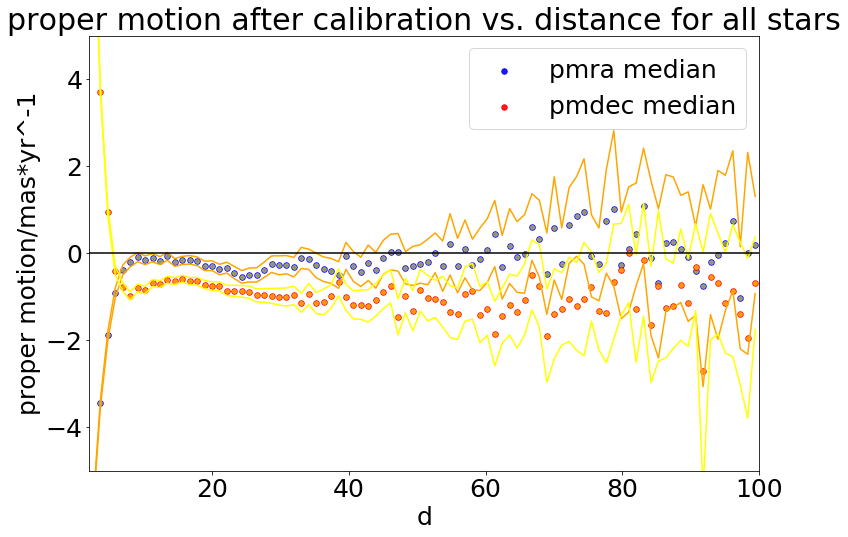

In [38]:
r = ms.r_psfflux_mag
gr = ms.gr
D = ms.Dkpc
pmra = ms.pmra_cl_sm
pmdec = ms.pmdec_cl_sm
t=ms
fig,ax = plt.subplots(1,1,figsize=(12,8))
#plt.scatter(t.Dkpc, t.dra_cl, s=0.01, c='blue', label='dra')
#plt.scatter(t.Dkpc, t.ddec_cl, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-5,5)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pmra, 2, 100, 90, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmdec, 2, 100, 90, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmra median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmdec median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion after calibration vs. distance for all stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/delta_vs_d_allstar_sm.png')

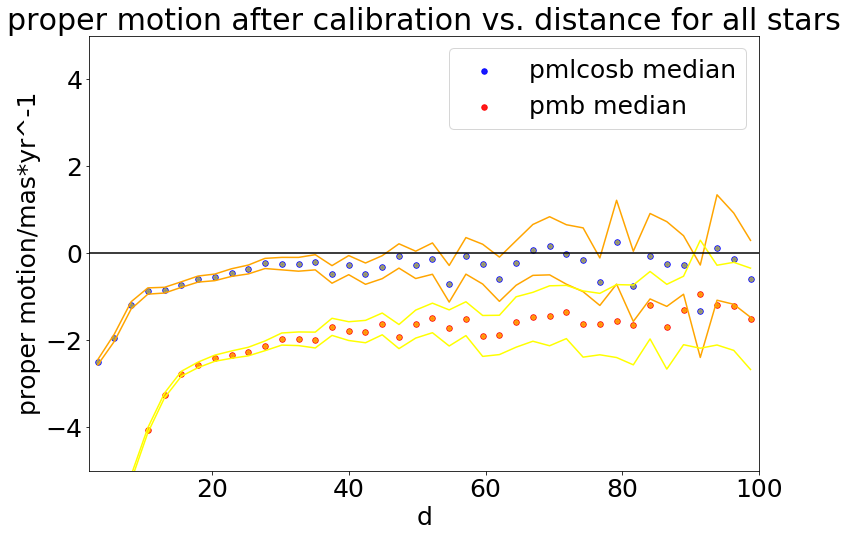

In [99]:
r = ms.r_psfflux_mag
gr = ms.gr
D = ms.Dkpc
pml = ms.pm_lcosb
pmb = ms.pm_b

t=ms
fig,ax = plt.subplots(1,1,figsize=(12,8))
#plt.scatter(t.Dkpc, t.dra_cl, s=0.01, c='blue', label='dra')
#plt.scatter(t.Dkpc, t.ddec_cl, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-5,5)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pml, 2, 100, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmb, 2, 100, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmlcosb median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmb median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion after calibration vs. distance for all stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/lb_vs_d_allstar.png')

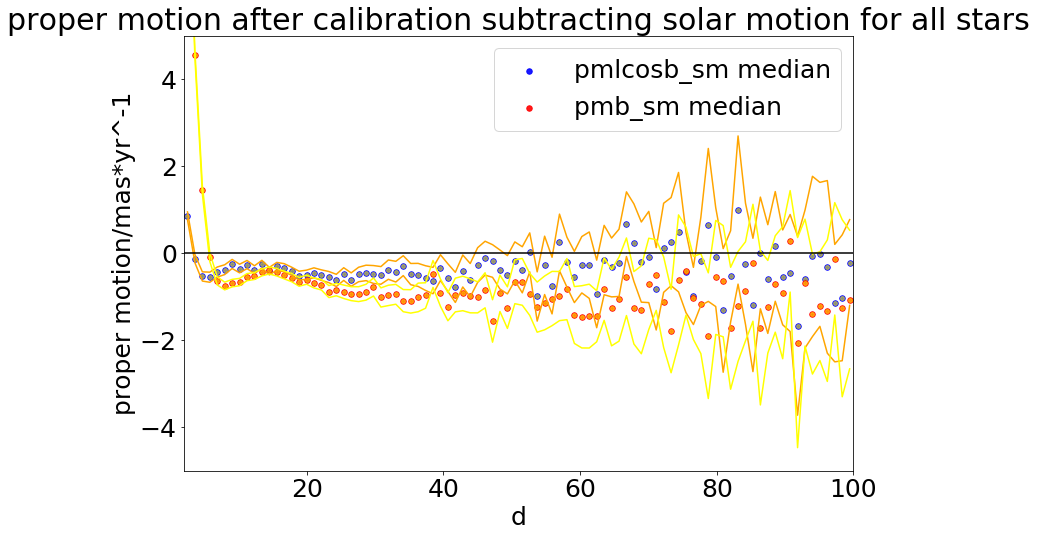

In [20]:
r = ms.r_psfflux_mag
gr = ms.gr
D = ms.Dkpc
pml = ms.pm_lcosb_sm
pmb = ms.pm_b_sm

t=ms
fig,ax = plt.subplots(1,1,figsize=(12,8))
#plt.scatter(t.Dkpc, t.dra_cl, s=0.01, c='blue', label='dra')
#plt.scatter(t.Dkpc, t.ddec_cl, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-5,5)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pml, 2, 100, 90, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmb, 2, 100, 90, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmlcosb_sm median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmb_sm median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion after calibration subtracting solar motion for all stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/lb_vs_d_allstar_sm.png')

## red star

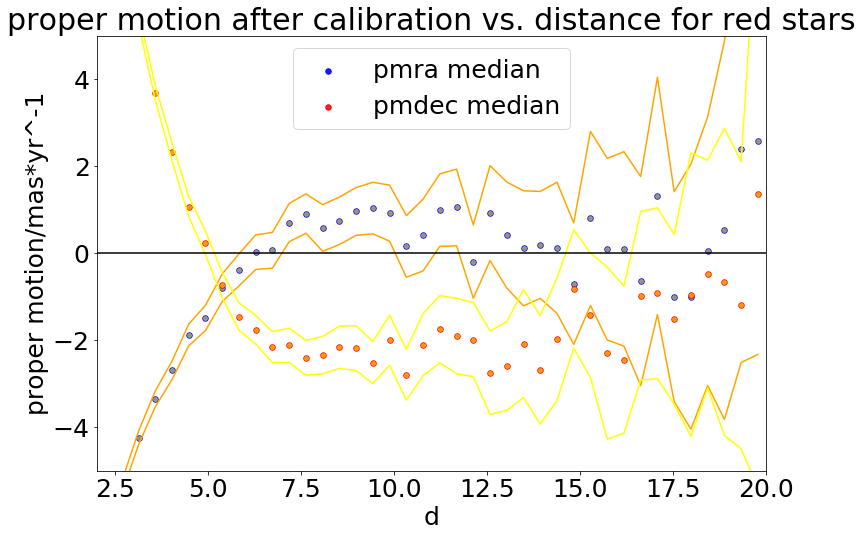

In [39]:
r = mr.r_psfflux_mag
gr = mr.gr
D = mr.Dkpc
pmra = mr.pmra_cl_sm
pmdec = mr.pmdec_cl_sm
t=mr
fig,ax = plt.subplots(1,1,figsize=(12,8))
#plt.scatter(t.Dkpc, t.dra_cl, s=0.01, c='blue', label='dra')
#plt.scatter(t.Dkpc, t.ddec_cl, s=0.01, c='red', label='ddec')
ax.set_xlim(2,20)
ax.set_ylim(-5,5)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pmra, 2, 20, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmdec, 2, 20, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmra median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmdec median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion after calibration vs. distance for red stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/delta_vs_d_redstar_sm.png')

## blue star

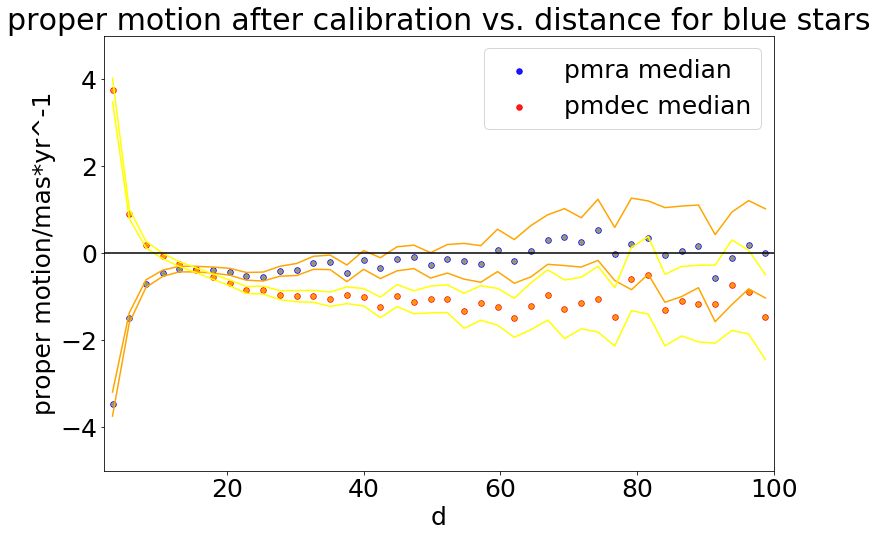

In [100]:
r = mb.r_psfflux_mag
gr = mb.gr
D = mb.Dkpc
pmra = mb.pmra_cl_sm
pmdec = mb.pmdec_cl_sm
t=mb
fig,ax = plt.subplots(1,1,figsize=(12,8))
#plt.scatter(t.Dkpc, t.dra_cl, s=0.01, c='blue', label='dra')
#plt.scatter(t.Dkpc, t.ddec_cl, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-5,5)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pmra, 2, 100, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmdec, 2, 100, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmra median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmdec median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion after calibration vs. distance for blue stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/delta_vs_d_bluestar_sm.png')

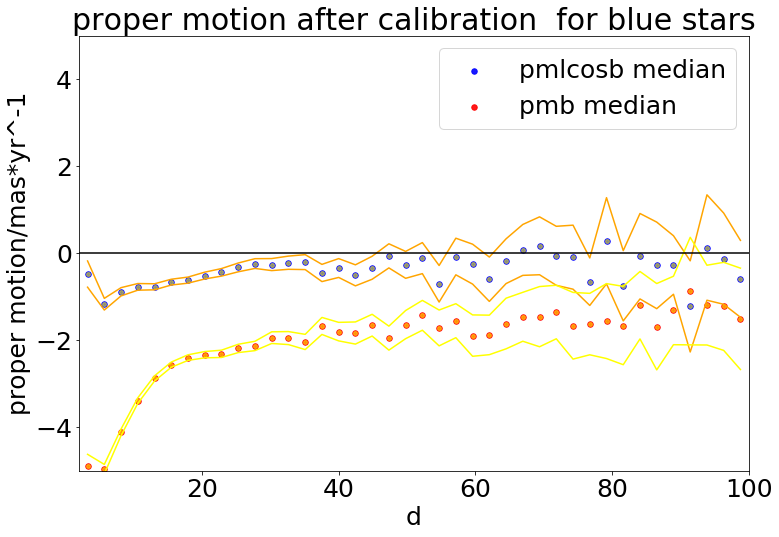

In [101]:
r = mb.r_psfflux_mag
gr = mb.gr
D = mb.Dkpc
pml = mb.pm_lcosb
pmb = mb.pm_b

t=mb
fig,ax = plt.subplots(1,1,figsize=(12,8))
#plt.scatter(t.Dkpc, t.dra_cl, s=0.01, c='blue', label='dra')
#plt.scatter(t.Dkpc, t.ddec_cl, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-5,5)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pml, 2, 100, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmb, 2, 100, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmlcosb median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmb median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion after calibration  for blue stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/lb_vs_d_bluestar.png')

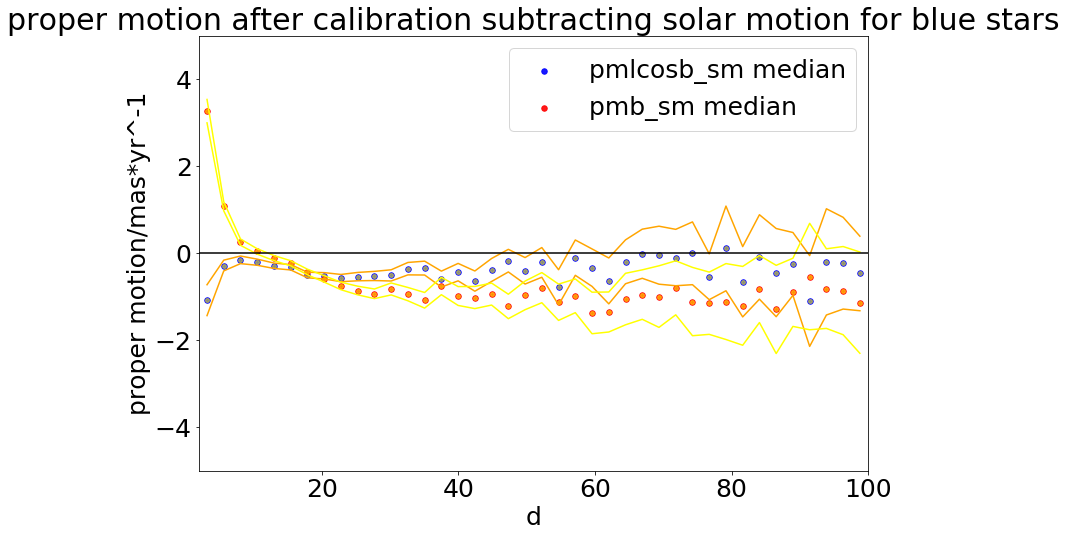

In [102]:
r = mb.r_psfflux_mag
gr = mb.gr
D = mb.Dkpc
pml = mb.pm_lcosb_sm
pmb = mb.pm_b_sm

t=mb
fig,ax = plt.subplots(1,1,figsize=(12,8))
#plt.scatter(t.Dkpc, t.dra_cl, s=0.01, c='blue', label='dra')
#plt.scatter(t.Dkpc, t.ddec_cl, s=0.01, c='red', label='ddec')
ax.set_xlim(2,100)
ax.set_ylim(-5,5)
ax.set_xlabel('d')
ax.set_ylabel('proper motion/mas*yr^-1')
# binned medians to be more quantitative 
x1Bin, n1Pts, m1edianBin, s1igGbin = fitMedians(D, pml, 2, 100, 40, 0)
x2Bin, n2Pts, m2edianBin, s2igGbin = fitMedians(D, pmb, 2, 100, 40, 0)
ax.scatter(x1Bin, m1edianBin, s=30.0, c='blue', alpha=0.9, label='pmlcosb_sm median')
ax.scatter(x1Bin, m1edianBin, s=15.0, c='yellow', alpha=0.5)
ax.scatter(x2Bin, m2edianBin, s=30.0, c='red', alpha=0.9, label='pmb_sm median')
ax.scatter(x2Bin, m2edianBin, s=15.0, c='yellow', alpha=0.5)
T1woSigP = m1edianBin + 2*s1igGbin
T1woSigM = m1edianBin - 2*s1igGbin 
T2woSigP = m2edianBin + 2*s2igGbin
T2woSigM = m2edianBin - 2*s2igGbin 
ax.plot(x1Bin, T1woSigP, c='orange')
ax.plot(x1Bin, T1woSigM, c='orange')
ax.plot(x2Bin, T2woSigP, c='yellow')
ax.plot(x2Bin, T2woSigM, c='yellow')
xL = np.linspace(0,100)
ax.plot(xL, 0*xL+0.00, c='black')
plt.title('proper motion after calibration subtracting solar motion for blue stars')
plt.legend()
plt.savefig('../Downloads/cali_dist/lb_vs_d_bluestar_sm.png')

In [11]:
def getMainSequenceAbsMag(gi,FeH): 
    """Get absolute magnitude for main sequence stars using eqs. 2, 5, and 7 from
       Ivezic et al. 2008 (ApJ, 684, 287)"""

    # valid for 0.2 < g-i < 4.0 
    Mr0 = -5.06 + 14.32*gi - 12.97*gi**2 + 6.127*gi**3 - 1.267*gi**4 + 0.0967*gi**5
    # offset for metallicity, valid for -2.5 < FeH < 0.2
    Mr = Mr0 + 4.50 - 1.11*FeH - 0.18*FeH**2
    return Mr

def getMainSequenceDistanceKpc(gi,FeH,r): 
    """Get stellar distance in kpc"""
    
    # valid for 0.2 < g-i < 4.0 and -2.5 < FeH < 0.2
    Mr = getMainSequenceAbsMag(gi,FeH)
    # distance in kpc
    Dkpc = 0.01 * 10**(0.2*(r-Mr))
    return Dkpc

def getMainSequenceAppMagforDistanceKpc(gi,FeH,Dkpc): 
    """Get apparent mag array for g-i array, given FeH and Dkpc"""
    # valid for 0.2 < g-i < 4.0 and -2.5 < FeH < 0.2
    Mr = getMainSequenceAbsMag(gi,FeH)
    return Mr + 5*np.log10(100*Dkpc)  

def getPhotomMetallicityBond2010(ug,gr):
    """Get stellar photometric metallicity from the SDSS u, g and r magnitudes
       using eq.A1 from Bond et al. 2010 (ApJ, 716, 1):
       [Fe/H]=A+Bx+Cy+Dxy+Ex2+Fy2+Gx2y+Hxy2+Ix3+Jy3
       with x = (u-g) and y = (g-r), and the best-fit coefficients 
       (A-J) = (-13.13, 14.09, 28.04, -5.51, -5.90, -58.68, 9.14, -20.61, 0.0, 58.20).
       This expression if valid only for g-r<0.6; for redder stars uses [Fe/H] = -0.6.
       Beyond the limits -2.5 and 0.5, use the limits. Add Gaussian noise with rms=0.1"""

    # aux variables
    x = ug
    y = gr
    xy = x*y
    x2 = x*x
    y2 = y*y
    x2y = x*x*y
    xy2 = x*y*y
    y3 = y*y*y

    A = -13.13  
    B =  14.09
    C =  28.04
    D =  -5.51
    E =  -5.90
    F = -58.68
    G =   9.14
    H = -20.61
    I =  58.20
    FeH = A + B*x + C*y + D*xy + E*x2 + F*y2 + G*x2y + H*xy2 + I*y3 
    # add Gaussian noise (rms=0.1 dex) 
    np.random.seed(666) 
    b = np.random.randn(FeH.shape[0])  # Gaussian
    FeH = FeH + 0.1*b
    FeH[gr>0.6] = -0.6
    FeH[FeH < -2.5] = -2.5
    FeH[FeH > 0.5] = 0.5
    return FeH    

In [4]:
# given vectors x and y, fit medians in bins from xMin to xMax, with Nbin steps,
# and return xBin, medianBin, medianErrBin 
def fitMedians(x, y, xMin, xMax, Nbin, verbose=1): 

    # first generate bins
    xEdge = np.linspace(xMin, xMax, (Nbin+1)) 
    xBin = np.linspace(0, 1, Nbin)
    nPts = 0*np.linspace(0, 1, Nbin)
    medianBin = 0*np.linspace(0, 1, Nbin)
    sigGbin = -1+0*np.linspace(0, 1, Nbin) 
    for i in range(0, Nbin): 
        xBin[i] = 0.5*(xEdge[i]+xEdge[i+1]) 
        yAux = y[(x>xEdge[i])&(x<=xEdge[i+1])]
        if (yAux.size > 0):
            nPts[i] = yAux.size
            medianBin[i] = np.median(yAux)
            # robust estimate of standard deviation: 0.741*(q75-q25)
            sigmaG = 0.741*(np.percentile(yAux,75)-np.percentile(yAux,25))
            # uncertainty of the median: sqrt(pi/2)*st.dev/sqrt(N)
            sigGbin[i] = np.sqrt(np.pi/2)*sigmaG/np.sqrt(nPts[i])
        else:
            nPts[i] = 0 
            medianBin[i] = 0 
            sigGbin[i] = 0 
            # nPts[i], medianBin[i], sigGBin[i] = 0 
        
    if (verbose):
        print('median:', np.median(medianBin[nPts>0]))

    return xBin, nPts, medianBin, sigGbin


def plotCoded2DmapRAbins(x, y, z, RA, xMin, xMax, yMin, yMax, nBin, xLabel, yLabel, cLabel, median=True):

    rcParams['ytick.labelsize'] = 15
    rcParams['xtick.labelsize'] = 15
    rcParams['axes.labelsize'] = 20
    rcParams['axes.linewidth'] = 2
    rcParams['font.size'] = 15
    rcParams['axes.titlesize'] = 18

    def selectRAbin(x, y, z, RA, RAmin, RAmax): 
        xB = x[(RA>RAmin)&(RA<RAmax)]
        yB = y[(RA>RAmin)&(RA<RAmax)]
        zB = z[(RA>RAmin)&(RA<RAmax)]
        return xB, yB, zB 

    # define plotting space 
    fig = plt.figure(figsize=(15,8)) 
    fig.subplots_adjust(hspace=0.35, top=0.85, bottom=0.1, left=0.12, right=0.93)
    # location of the colorbar in Figure units 
    bottom, height =  0.97, 0.02 
            
    # calculate the 2D statistics 
    if (median):
        statsName = 'median'   
        cLlabel = 'median ' + cLabel
    else:
        statsName = 'rms' 
        cLlabel = 'rms for ' + cLabel
         
    RAmin = np.zeros(6) 
    RAmin[0] = 20
    RAmin[1] = 10
    RAmin[2] = 0
    RAmin[3] = 350
    RAmin[4] = 340
    RAmin[5] = 330


    for i in range(0,6):
        ax = plt.subplot(2,3,i+1) 
        ax.set_xlabel(xLabel)
        ax.set_ylabel(yLabel)
        title = 'RA'+str(RAmin[i])+'-'+str(RAmin[i]+10)
        ax.set_title(title)
        plt.xlim([xMin,xMax])
        plt.ylim([yMax,yMin])

        # extract the 2D statistic,  and location of bin edges 
        xB, yB, zB = selectRAbin(x, y, z, RA, RAmin[i], RAmin[i]+10.0)
        # print('i:', i, np.size(xB), np.size(yB), np.size(zB))
        stats =  binned_statistic_2d(xB, yB, zB, statistic=statsName, bins=nBin)
        H, xedges, yedges= stats[0].T , stats[1], stats[2]

        # span the grid from bin edges 
        X_, Y_ = np.meshgrid(xedges, yedges)
        cmap = 'viridis'
        cmap = 'jet'


        # plot the image 
        image = ax.pcolormesh(X_, Y_, H, cmap=cmap)

        if (i==0): 
            # extract the left corner and width of colorbar from axis - 
            # works well for multiple axes since location of 
            # new axis must be in figure units 
            l,b,w,h = ax.get_position().bounds
            cax = fig.add_axes([l,bottom,w,height])
            # plot the colorbar 
            plt.colorbar(mappable = image, cax = cax, orientation='horizontal', label=cLlabel)
'''         
        if (1):
            giGrid = np.linspace(0.0,4.5,100)
            FeH = -1.5
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,0.3)
            ax.plot(giGrid, rD)
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,1.0)
            ax.plot(giGrid, rD)
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,3.0)
            ax.plot(giGrid, rD)
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,10.0)
            ax.plot(giGrid, rD)
            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,30.0)
            ax.plot(giGrid, rD)

'''
 #   plt.savefig('Fig_Coded2DmapRAbins.png', bbox_inches='tight', dpi=100)

'         \n        if (1):\n            giGrid = np.linspace(0.0,4.5,100)\n            FeH = -1.5\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,0.3)\n            ax.plot(giGrid, rD)\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,1.0)\n            ax.plot(giGrid, rD)\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,3.0)\n            ax.plot(giGrid, rD)\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,10.0)\n            ax.plot(giGrid, rD)\n            rD = getMainSequenceAppMagforDistanceKpc(giGrid,FeH,30.0)\n            ax.plot(giGrid, rD)\n\n'